<a href="https://colab.research.google.com/github/Shubhangini19/netflix-unsupervised/blob/main/Unsupervised_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**  Shubhangini Ganguli
##### **Team Member 2 -**  Shabana Ali
##### **Team Member 3 -**  Mohd Ashif Khan
##### **Team Member 4 -**  Mayank Belwal

# **Project Summary -**

1.The goal of the project was to analyze and cluster Netflix movies and TV shows based on their genre, director,cast,country and description, and to develop a recommender system that recommends movies and TV shows based on user preferences.

2.The project used a dataset of Netflix movies and TV shows.The dataset contained information such as the title, director, cast, country, date added, release year, rating, and genre of each movie and TV show.

3.The project first performed data cleaning and preprocessing on the dataset. This included handling missing values, converting data types, and creating new features.

4.The project then used unsupervised machine learning techniques such as k-means clustering and hierarchical clustering to cluster the movies and TV shows based on their genre,director,cast,country and description.

5.The project also developed a content-based recommender system that recommends movies and TV shows based on their similarity to other movies and TV shows.

6.The content-based recommender system used features such as genre, director, cast to compute the similarity between movies and TV shows. The similarity was measured using cosine similarity, which measures the cosine of the angle between two vectors in a high-dimensional space.

7.Finally the project demonstrated the usefulness of unsupervised machine learning techniques for analyzing and clustering large datasets of movies and TV shows, as well as the effectiveness of content-based recommender systems for providing personalized recommendations based on user preferences.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do:

1.Exploratory Data Analysis

2.Understanding what type content is available in different countries

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.

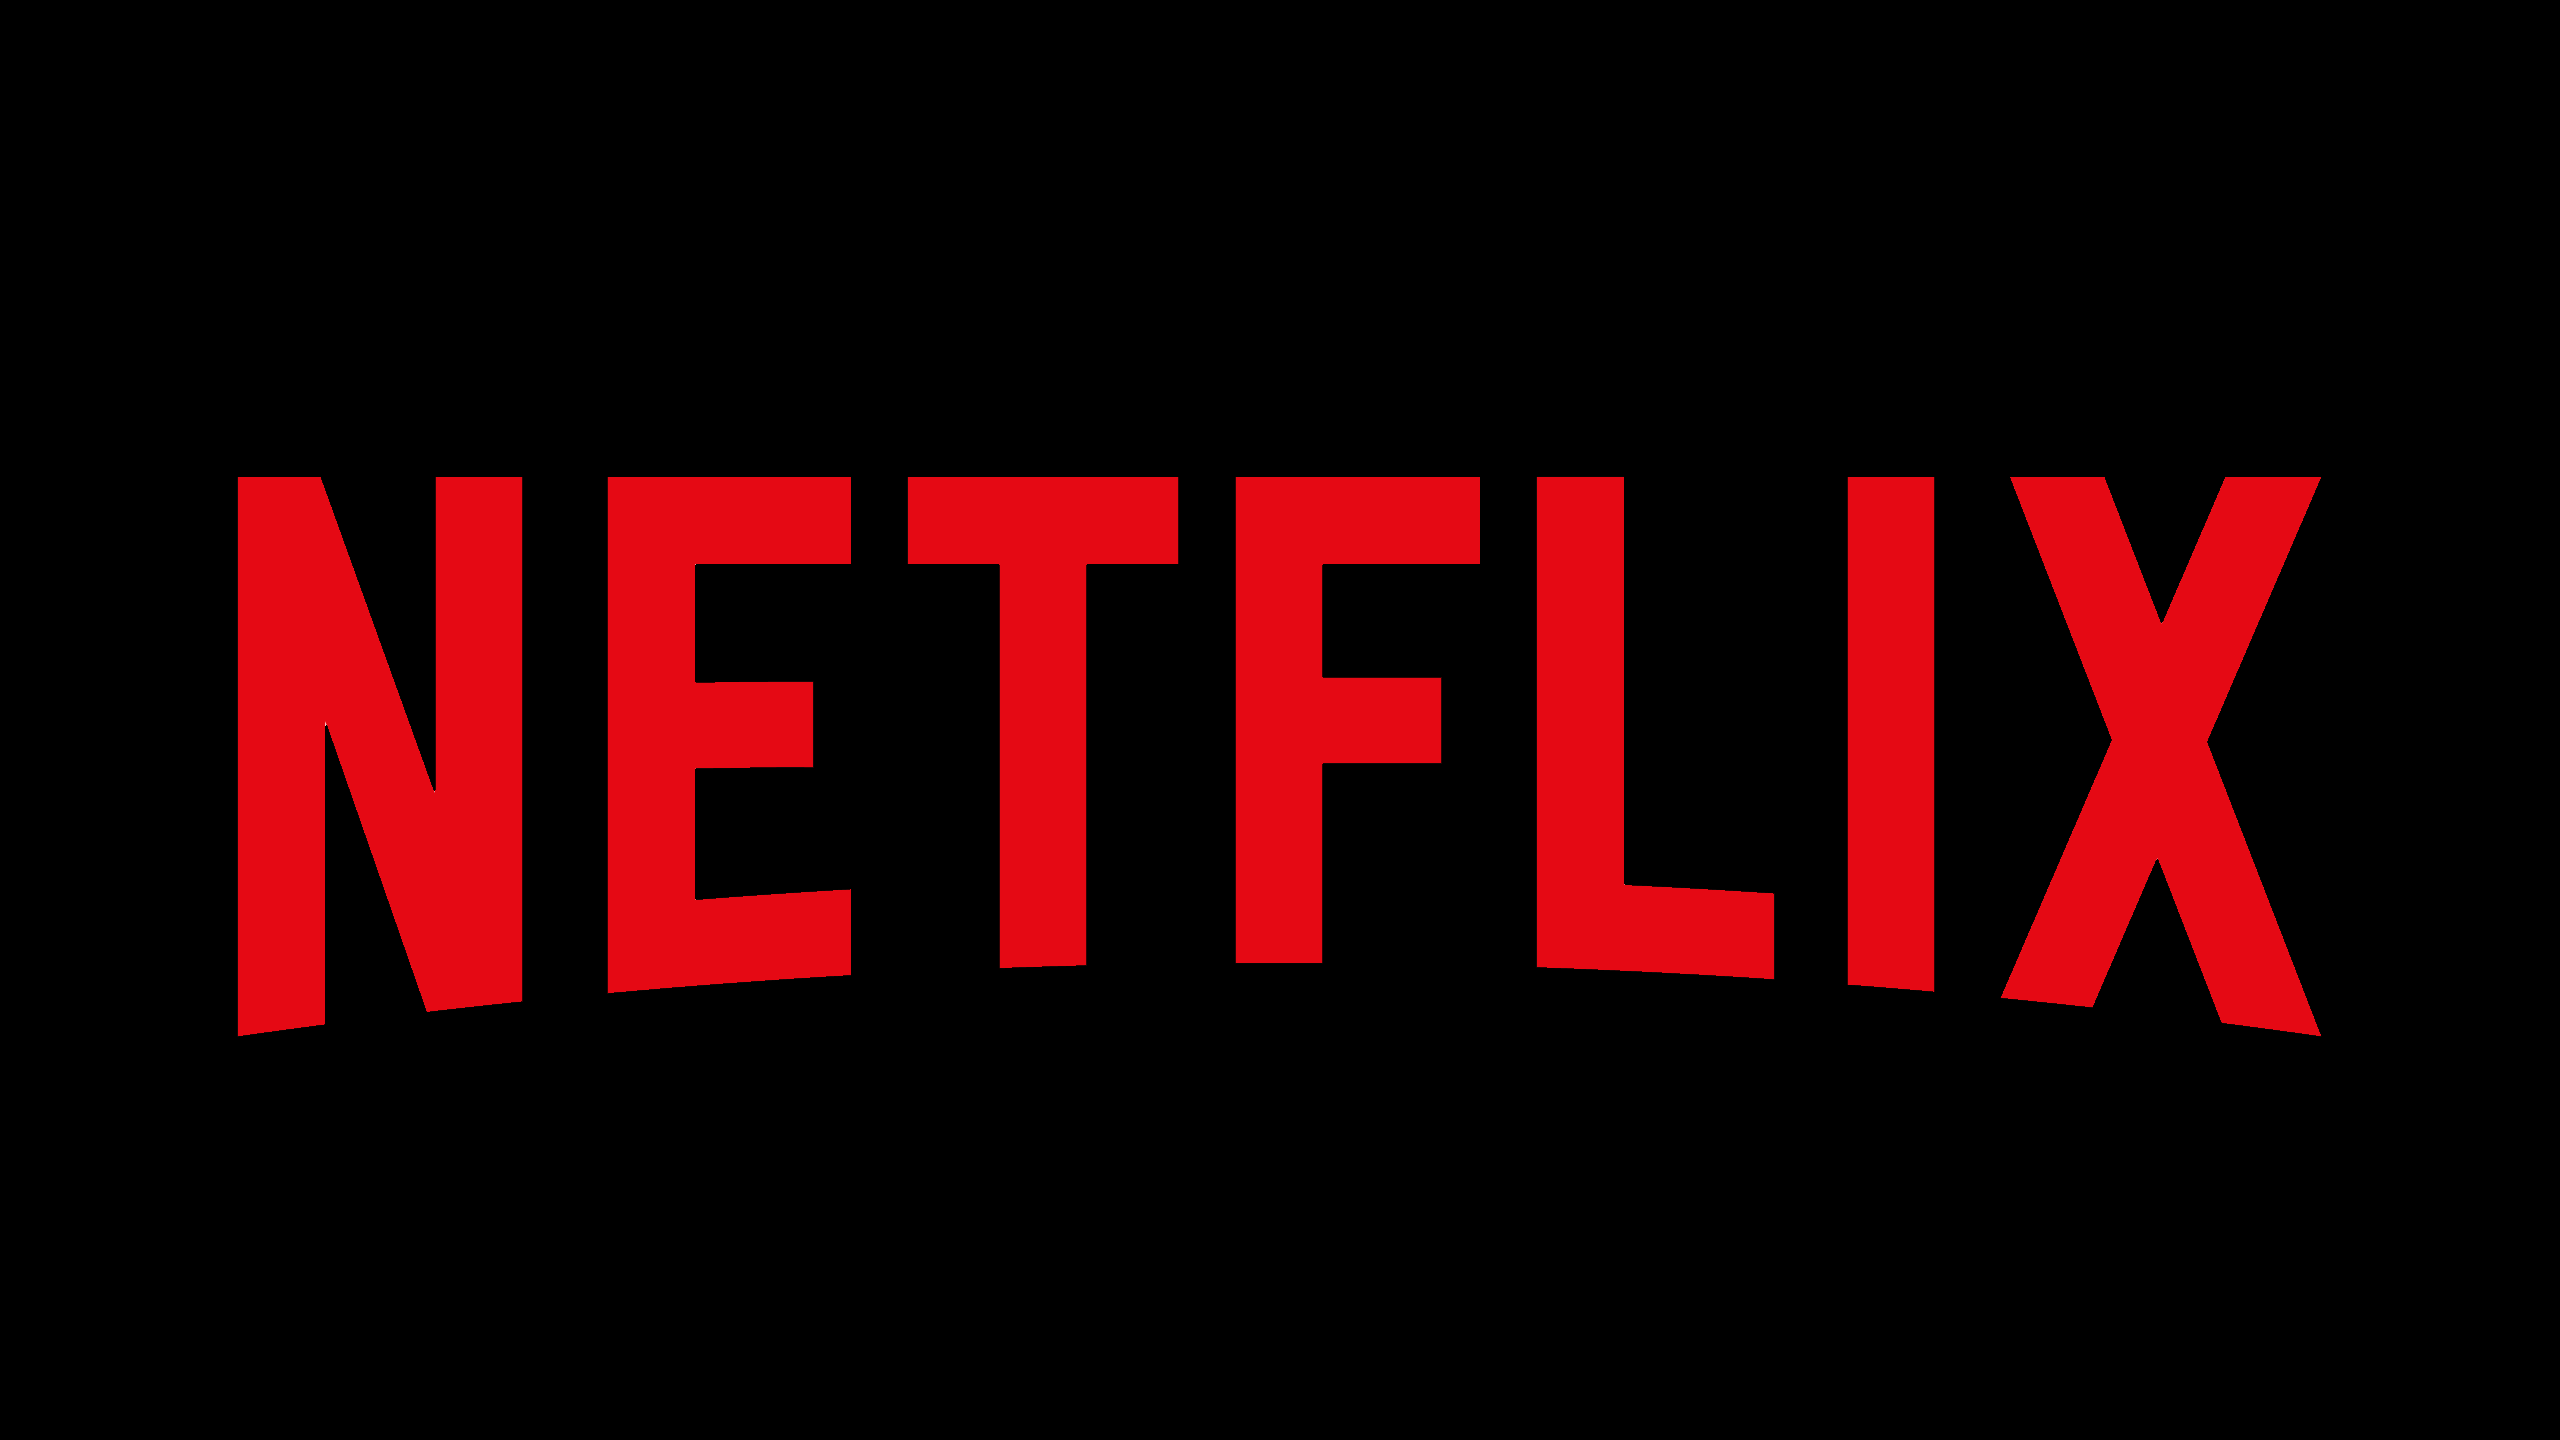

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import missingno as msno

In [ ]:
#mounting the dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
file_path = ('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
recommender_df = df.copy()

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows in datasets are {df.shape[0]}')
print(f'Number of columns in datasets are {df.shape[1]}')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Duplicates entries in datasets are {df.duplicated().sum()}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()*100/len(df)

In [ ]:
# Visualizing the missing values
msno.bar(df)
plt.show()

### What did you know about your dataset?

* There are 7787 rows and 12 columns present in dataset.

* Datatypes of variables present in datasets are object as well as integer.

* There is no duplicate entries in the dataset.

* There are missing values present in the column director,cast,country and rating

#### Missing Values Imputation

In [ ]:
# Replacing missing values in the director, cast, and country column with 'Unknown'
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

# Replacing the missing values present in rating column with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the missing value present in date_added column
df.dropna(axis=0, inplace = True)

In [ ]:
clean_df = df[df != 'Unknown'].dropna()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

* show_id : Unique ID for every Movie / Tv Show
* type : Identifier - A Movie or TV Show
* title : Title of the Movie / Tv Show
* director : Director of the Movie
* cast : Actors involved in the movie / show
* country : Country where the movie / show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Releaseyear of the movie / show
* rating : TV Rating of the movie / show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for elem in df.columns:
  if df[elem].nunique() < 50 :
    print("-"*100)
    print(" ")
    print(f'Unique values present in {elem} are')
    print(" ")
    print(df[elem].unique())
    print(" ")
    print("*"*100)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Dropping the column show_id
df.drop(columns = ['show_id'],inplace = True)

In [ ]:
# Looking datatypes of the feature available in dataset
df.dtypes

In [ ]:
# for tv shows duration is in seasons and for movies duration is in minutes
df[df['type'] == 'TV Show']['duration'].unique()

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x : int(x.split(" ")[0]))

In [ ]:
# Creating feature month name from date_added columns
df['month_added'] = df['date_added'].apply(lambda x : x.split(" ")[0])

In [ ]:
# Creating feature year from date_added columns
df['year_added'] = df['date_added'].apply(lambda x : x.split(" ")[-1])

In [ ]:
# Dropping the column date_added
df.drop(columns = ['date_added'],inplace = True)

In [ ]:
# Applying value counts on country
df['country'].value_counts()

In [ ]:
# Choosing the main country
df['country'] = df['country'].apply(lambda x : x.split(",")[0])

In [ ]:
# Choosing the main genres
df['genres'] = df['listed_in'].apply(lambda x : x.split(",")[0])

In [ ]:
# Applying value_counts on 'rating'.
df['rating'].value_counts().to_frame()

* TV-MA: This rating indicates that the content is intended for mature audiences only and may contain adult themes, language, nudity, violence, and other mature content.

* R: This rating indicates that the content is restricted and may contain adult themes, language, nudity, violence, and other mature content.

* PG-13: This rating indicates that the content may contain material that parents may find inappropriate for children under 13 years of age.

* TV-14: This rating indicates that the content may contain material that is inappropriate for children under 14 years of age.

* TV-PG: This rating indicates that the content is intended for a general audience but may contain some material that parents may find inappropriate for younger children.

* NR: This rating stands for "Not Rated" and indicates that the content has not been officially rated by a classification board.

* TV-G: This rating indicates that the content is suitable for a general audience and contains little or no violence, sexual content, or mature themes.

* TV-Y: This rating indicates that the content is intended for children under 7 years of age.

* TV-Y7: This rating indicates that the content is intended for children 7 years and older.

* PG: This rating indicates that the content may contain material that parents may find inappropriate for younger children.

* G: This rating indicates that the content is suitable for all ages and contains little or no violence, sexual content, or mature themes.

* NC-17: This rating indicates that the content is intended for adults only and may contain adult themes, language, nudity, violence, and other mature content.

* TV-Y7-FV: This rating indicates that the content is intended for children 7 years and older and may contain fantasy violence.

* UR: This rating stands for "Unrated" and indicates that the content has not been officially rated by a classification board.

In [ ]:
# On the basis of description of rating ,assinging rating according to age_groups
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['target_ages'] = df['rating'].replace(ratings_ages) 

In [ ]:
# Now checking unique values present in target_ages
df['target_ages'].unique()

In [ ]:
# Separating dataframe on the basis of type of show
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

### What all manipulations have you done and insights you found?

Following Data Manipulations are done:
* Dropped the column show_id
* Splitted the duration column in order to remove units present inside the category of duration column.
* Created feature month name from date_added columns.
* Created feature year from date_added columns.
* Selected the principle country from the available country list.
* Selected the main genres from the listed genres.
* On the basis of description of rating,assingned rating according to age_groups.
* Created movies_df and tv_df on the basis of type of show.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***